<a href="https://colab.research.google.com/github/Eshwar-Naidus/task-1/blob/main/task%601.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Task 1: Data Cleaning & Preprocessing ---
Successfully loaded data from '/content/sample_data/Titanic-Dataset.csv'.

--- 3. Initial Data Exploration ---

Data Head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85    

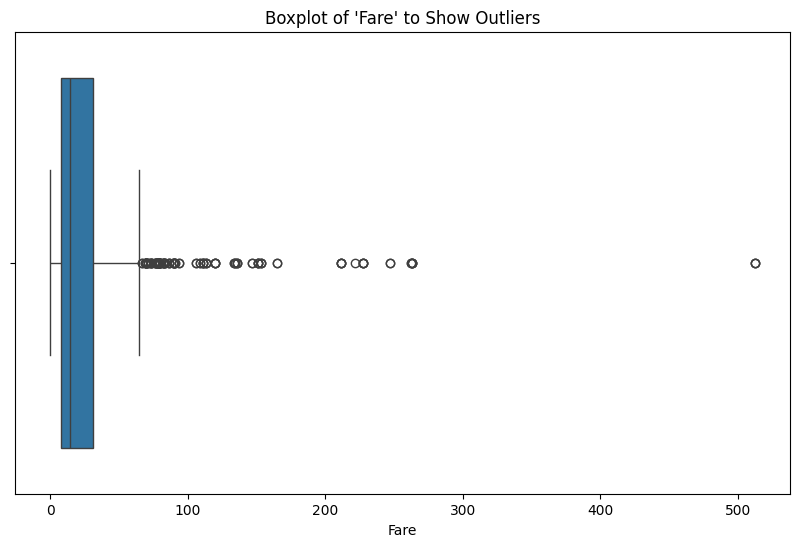

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import io
import os

# --- Task 1: Data Cleaning & Preprocessing ---
print("--- Task 1: Data Cleaning & Preprocessing ---")

# --- 1. Define File Name ---
FILE_PATH = '/content/sample_data/Titanic-Dataset.csv' # Define the path to the dataset file

# --- 2. Load Data from CSV ---
# Load the dataset into a pandas DataFrame
try:
    df = pd.read_csv(FILE_PATH)
    print(f"Successfully loaded data from '{FILE_PATH}'.")
except FileNotFoundError:
    print(f"Error: '{FILE_PATH}' not found.")
    print("Please make sure the dataset file is in the correct directory.")
    df = None # Set df to None if file not found to prevent further errors

# Proceed with preprocessing only if the DataFrame was loaded successfully
if df is not None:
    print("\n--- 3. Initial Data Exploration ---")
    print("\nData Head:")
    print(df.head())

    # --- 4. Feature Selection (Dropping Columns) ---
    # Drop columns that are not relevant for the model
    columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
    df = df.drop(columns=columns_to_drop)
    print(f"\nDropped columns: {columns_to_drop}.")

    # --- 5. Define Feature Types ---
    # Identify numerical and categorical features
    numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
    categorical_features = ['Embarked', 'Sex', 'Pclass'] # Pclass is treated as categorical

    # --- 6. Build Preprocessing Pipelines ---

    # Pipeline for numerical data: Imputation and Scaling
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')), # Fill missing numerical values with the median
        ('scaler', StandardScaler()) # Scale numerical features
    ])

    # Pipeline for categorical data: Imputation and One-Hot Encoding
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')), # Fill missing categorical values with the most frequent
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # One-hot encode categorical features
    ])

    # --- 7. Combine Preprocessing Steps using ColumnTransformer ---
    # Apply different transformations to different columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough' # Keep the 'Survived' column (target variable)
    )

    # --- 8. Apply the Preprocessing to the Data ---
    # Separate features (X) and target (y)
    X = df.drop('Survived', axis=1)
    y = df['Survived']

    print("\n--- Applying Preprocessing Pipeline (Imputation, Encoding, Scaling) ---")
    X_processed = preprocessor.fit_transform(X)

    # --- 9. Create Processed DataFrame (for inspection and model training) ---
    # Get the names of the processed features
    processed_feature_names = numerical_features + \
                              list(preprocessor.named_transformers_['cat']
                                   .named_steps['onehot']
                                   .get_feature_names_out(categorical_features))

    df_processed = pd.DataFrame(X_processed, columns=processed_feature_names)
    df_processed['Survived'] = y.values # Add the target variable back to the processed DataFrame

    print("\n--- 10. Preprocessing Complete. Processed Data Head: ---")
    print(df_processed.head())

    # --- 11. Visualize and Save Outlier Boxplot for Fare ---
    # Use the original 'Fare' data to visualize outliers before scaling
    print("\n--- Generating Boxplot for 'Fare' Outliers ---")

    # Create the boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['Fare'].dropna()) # Drop missing values for plotting
    plt.title("Boxplot of 'Fare' to Show Outliers")
    plt.xlabel("Fare")

    # Save the plot to a file
    output_plot_filename = 'fare_boxplot.png'
    plt.savefig(output_plot_filename)
    print(f"\nSuccessfully saved '{output_plot_filename}' to {os.path.abspath(output_plot_filename)}")

    print("--- Data Preprocessing and Visualization Finished ---")
else:
    print("\n--- Data Loading Failed. Preprocessing Skipped. ---")

In [2]:
import os
print(f"Current working directory: {os.getcwd()}")
print("Files in the current directory:")
print(os.listdir())

Current working directory: /content
Files in the current directory:
['.config', 'sample_data']
